## Design Summary

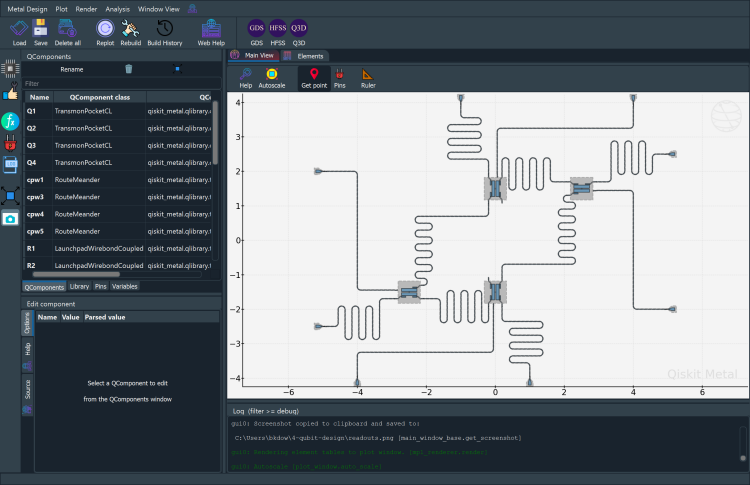


Target frequencies are summarized below. Frequency spacings are set to be as large as possible within the given constraint on the available electronnics to minimize the crosstalk. Target readout frequencies are calculated from the set qubit frequencies with the formula $\chi\approx-\frac{g^2 E_c}{\Delta (\Delta-Ec)}$. Substituting the target values given in the problem yields a quadratic equation on the detuning $\Delta = \omega_q-\omega_r$, which gives the solution of $\Delta = -1.8$ or $1.5$.

### Target Frequencies
| Qubit # | Q1 | Q2 | Q3 | Q4|
|---|---|---|---|---|
|Freq(GHz)|5.25|5.42|5.58|5.75|

| RO # | RO1 | RO2 | RO3 | RO4|
|---|---|---|---|---|
|Freq(GHz)|7.05|7.22|7.38|7.55|

| CPW # | CPW1 | CPW2 | CPW3 | CPW4|
|---|---|---|---|---|
|Freq(GHz)|8.00|8.40|8.80|9.20|

### Achieved Frequencies
| Qubit # | Q1 | Q2 | Q3 | Q4|
|---|---|---|---|---|
|Freq(GHz)|5.25984|5.486713|5.557822|5.75221|

| RO # | RO1 | RO2 | RO3 | RO4|
|---|---|---|---|---|
|Freq(GHz)|6.7134|7.10829|7.38|7.78023|

| CPW # | CPW1 | CPW2 | CPW3 | CPW4|
|---|---|---|---|---|
|Freq(GHz)|7.78023|8.69631|8.767001|9.16086|

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from qiskit_metal import designs, MetalGUI

design = designs.DesignPlanar()
design.overwrite_enabled = True

In [3]:
design.chips.main.size_x = '12mm'
design.chips.main.size_y = '10mm'

In [4]:
gui = MetalGUI(design)

In [5]:
from qiskit_metal.qlibrary.qubits.transmon_pocket_cl import TransmonPocketCL

design.delete_all_components()

design_span_x = 5
design_span_y = 3

half_chip_width = design_span_x / 2
half_chip_height = design_span_y / 2

connection_pads_options = dict(
    a = dict(loc_W=1, loc_H=-1),
    b = dict(loc_W=1, loc_H=1),
    c = dict(loc_W=-1, loc_H=-1)
)

connection23_pads_options = dict(
    a = dict(loc_W=1, loc_H=-1),
    c = dict(loc_W=-1, loc_H=-1)
)

transmons = []

transmons.append(TransmonPocketCL(design, 'Q1',
                      options=dict(pos_x=f'-{half_chip_width}mm',
                                   pos_y=f'{-half_chip_height}mm',
                                   connection_pads=dict(**connection_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q2',
                      options=dict(pos_x=f'0mm',
                                   pos_y=f'{half_chip_height}mm',
                                   orientation=-90,
                                   connection_pads=dict(d=dict(loc_W=-1, loc_H=1), **connection23_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q3',
                      options=dict(pos_x=f'0mm',
                                   pos_y=f'{-half_chip_height}mm',
                                   orientation=90,
                                   connection_pads=dict(d=dict(loc_W=-1, loc_H=1), **connection23_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q4',
                      options=dict(pos_x=f'{half_chip_width}mm',
                                   pos_y=f'{half_chip_height}mm',
                                   orientation=180,
                                   connection_pads=dict(**connection_pads_options))))

gui.rebuild()
gui.autoscale()

In [6]:
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal import Dict

fillet='99.99um'
options = Dict(
    meander=Dict(
        lead_start='0.1mm',
        lead_end='0.1mm',
        asymmetry='0 um')
)

def connect(component_name: str, component1: str, pin1: str, component2: str, pin2: str,
            length: str,
            asymmetry='0 um', start_strght='0 um', end_strght='0 um', flip=False):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        pin_inputs=Dict(
            start_pin=Dict(
                component=component1,
                pin=pin1),
            end_pin=Dict(
                component=component2,
                pin=pin2)),
        lead=Dict(
            start_straight=start_strght,
            end_straight=end_strght
        ),
        total_length=length,
    fillet = '99.9um')
    myoptions.update(options)
    myoptions.meander.asymmetry = asymmetry
    myoptions.meander.lead_direction_inverted = 'true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)

asym_h = 100
asym_v = 100
cpw = []

cpw.append(connect('cpw1', 'Q1', 'b', 'Q2', 'a', '8 mm', f'+{asym_h}um', '0.1mm', '0.1mm'))
cpw.append(connect('cpw3', 'Q4', 'b', 'Q3', 'a', '8 mm', f'+{asym_h}um', '0.1mm', '0.1mm'))
cpw.append(connect('cpw4', 'Q3', 'd', 'Q1', 'a', '8 mm', f'-{asym_h}um', '0.1mm', '0.1mm'))
cpw.append(connect('cpw5', 'Q2', 'd', 'Q4', 'a', '8 mm', f'-{asym_h}um', '0.1mm', '0.1mm'))


gui.rebuild()
gui.autoscale()

In [7]:
from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled

readouts_lwc = []
control_lwc = []

offset_x = 0
offset_y = 1


#Readouts
readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R1',
                                         options = dict(
                                         pos_x = '-5mm',
                                         pos_y = f'-{half_chip_height+offset_y}mm',
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R2',
                                         options = dict(
                                         pos_x = '-1mm',
                                         pos_y = '4mm',
                                         orientation = -90,
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R3',
                                         options = dict(
                                         pos_x = '1mm',
                                         pos_y = '-4mm',
                                         orientation = 90,
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R4',
                                         options = dict(
                                         pos_x = '5mm',
                                         pos_y = f'{half_chip_height+offset_y}mm',
                                         orientation = 180,
                                         lead_length = '30um')))

#Controls
control_lwc.append(LaunchpadWirebondCoupled(design, 'CL1',
                                         options = dict(
                                         pos_x = '-5mm',
                                         pos_y = '2mm',
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL2',
                                         options = dict(
                                         pos_x = '4mm',
                                         pos_y = '4mm',
                                         orientation = -90,
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL3',
                                         options = dict(
                                         pos_x = '-4mm',
                                         pos_y = '-4mm',
                                         orientation = 90,
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL4',
                                         options = dict(
                                         pos_x = '5mm',
                                         pos_y = '-2mm',
                                         orientation = 180,
                                         lead_length = '30um')))

gui.rebuild()
gui.autoscale()

In [8]:
readout_lines = []

asym_14 = 700
asym_23 = 700
options = Dict(
    lead=Dict(
        start_straight='330um',
        end_straight='0um'),
    fillet='99.99um')

readout_lines.append(connect('ol1', 'Q1', 'c', 'R1', 'tie', '8 mm', f'{asym_14}um'))

options = Dict(
    lead=Dict(
        start_straight='430um',
        end_straight='0um'),
    fillet='99.99um')
readout_lines.append(connect('ol2', 'Q2', 'c', 'R2', 'tie', '8 mm', f'{asym_23}um'))
readout_lines.append(connect('ol3', 'Q3', 'c', 'R3', 'tie', '8 mm', f'{asym_23}um'))
readout_lines.append(connect('ol4', 'Q4', 'c', 'R4', 'tie', '8 mm', f'{asym_14}um'))

gui.rebuild()
gui.autoscale()

In [9]:
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors
from collections import OrderedDict
import numpy as np

control_lines = []

def connectRouteAnchor(name: str,
                       component1: str, pin1: str, component2: str, pin2: str,
                       anchor_points: OrderedDict) -> RouteAnchors:

    options_line_cl = dict(
        pin_inputs = dict(start_pin = dict(component = component1, pin = pin1),
                          end_pin = dict(component = component2, pin = pin2)),
        anchors = anchor_points,
        lead = dict(start_straight = '200um',
                    end_straight = '225um'),
        fillet = fillet
    )
    
    return RouteAnchors(design, name, options_line_cl)



anchors1c = OrderedDict()
anchors1c[0] = np.array([-4, -1.42])
anchors1c[1] = np.array([-4, 2])

control_lines.append(connectRouteAnchor('line_cl1', 'Q1', 'Charge_Line', 'CL1', 'tie', anchors1c))


anchors2c = OrderedDict()
anchors2c[0] = np.array([0.08, 3.25])
anchors2c[1] = np.array([4, 3.25])

control_lines.append(connectRouteAnchor('line_cl2', 'Q2', 'Charge_Line', 'CL2', 'tie', anchors2c))

anchors3c = OrderedDict()
anchors3c[0] = np.array([-0.08, -3.25])
anchors3c[1] = np.array([-4, -3.25])

control_lines.append(connectRouteAnchor('line_cl3', 'Q3', 'Charge_Line', 'CL3', 'tie', anchors3c))

anchors4c = OrderedDict()
anchors4c[0] = np.array([4, 1.42])
anchors4c[1] = np.array([4, -2])

control_lines.append(connectRouteAnchor('line_cl4', 'Q4', 'Charge_Line', 'CL4', 'tie', anchors4c))

gui.rebuild()
gui.autoscale()

In [ ]:
gui.autoscale()
gui.screenshot(name="full_design")

In [ ]:
import numpy as np
from scipy.constants import c, h, pi, hbar, e
from qiskit_metal.analyses.em.cpw_calculations import guided_wavelength

# constants:
phi0    = h/(2*e)
varphi0 = phi0/(2*pi)

# project target parameters
f_qList = np.around(np.linspace(5.25, 5.75, 4),2) # GHz
f_rList = f_qList + 1.8 # GHz
L_JJList = np.around(varphi0**2/((f_qList*1e9+300e6)**2/(8*300e6))/h*1e9, 2) # nH

# initial CPW readout lengths
def find_resonator_length(frequency, line_width, line_gap, N): 
    #frequency in GHz
    #line_width/line_gap in um
    #N -> 2 for lambda/2, 4 for lambda/4
    
    [lambdaG, etfSqrt, q] = guided_wavelength(frequency*10**9, line_width*10**-6,
                                              line_gap*10**-6, 750*10**-6, 200*10**-9)
    return str(lambdaG/N*10**3)+" mm"

find_resonator_length(f_rList, 10, 6, 2)

In [ ]:
find_resonator_length(np.around(np.linspace(8, 9.2, 4), 2), 10, 6, 2)

In [ ]:
transmons[0].options.pad_gap    = '40um'
transmons[0].options.pad_width  = '550um' # 405
transmons[0].options.pad_height = '120um'

transmons[1].options.pad_gap    = '40um'
transmons[1].options.pad_width  = '500um' # 405
transmons[1].options.pad_height = '120um'

transmons[2].options.pad_gap    = '40um'
transmons[2].options.pad_width  = '460um' # 405
transmons[2].options.pad_height = '120um'

transmons[3].options.pad_gap    = '40um'
transmons[3].options.pad_width  = '440um' # 405
transmons[3].options.pad_height = '120um'

readout_lines[0].options.total_length = '8.63mm'
readout_lines[1].options.total_length = '8.42mm'
readout_lines[2].options.total_length = '8.24mm'
readout_lines[3].options.total_length = '8.06mm'

cpw[0].options.total_length = '7.6mm'
cpw[1].options.total_length = '7.2mm'
cpw[2].options.total_length = '6.9mm'
cpw[3].options.total_length = '6.6mm'

gui.rebuild()
gui.autoscale()

qcomps = design.components  # short handle (alias)
qcomps['Q1'].options['hfss_inductance'] = 'Lj1'
qcomps['Q1'].options['hfss_capacitance'] = 'Cj1'
qcomps['Q2'].options['hfss_inductance'] = 'Lj2'
qcomps['Q2'].options['hfss_capacitance'] = 'Cj2'
qcomps['Q3'].options['hfss_inductance'] = 'Lj3'
qcomps['Q3'].options['hfss_capacitance'] = 'Cj3'
qcomps['Q4'].options['hfss_inductance'] = 'Lj4'
qcomps['Q4'].options['hfss_capacitance'] = 'Cj4'

### EPR Analysis

### Full Circuit

In [ ]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_qb = EPRanalysis(design, "hfss")
eig_qb.sim.setup.n_modes = 12
eig_qb.sim.setup.max_passes = 12
eig_qb.sim.setup.vars = Dict(Lj1= '10 nH', Cj1= '2 fF',
                           Lj2= '10 nH', Cj2= '2 fF',
                           Lj3= '10 nH', Cj3= '2 fF',
                           Lj4= '10 nH', Cj4= '2 fF')

eig_qb.sim.run(name="4Qubits", components=[])
eig_qb.sim.plot_convergences()

In [ ]:
del eig_qb.setup.junctions['jj']

eig_qb.setup.junctions.jj1 = Dict(rect='JJ_rect_Lj_Q1_rect_jj', line='JJ_Lj_Q1_rect_jj_',
                  Lj_variable='Lj1', Cj_variable='Cj1')
eig_qb.setup.junctions.jj2 = Dict(rect='JJ_rect_Lj_Q2_rect_jj', line='JJ_Lj_Q2_rect_jj_',
                  Lj_variable='Lj2', Cj_variable='Cj2')
eig_qb.setup.junctions.jj3 = Dict(rect='JJ_rect_Lj_Q3_rect_jj', line='JJ_Lj_Q3_rect_jj_',
                  Lj_variable='Lj3', Cj_variable='Cj3')
eig_qb.setup.junctions.jj4 = Dict(rect='JJ_rect_Lj_Q4_rect_jj', line='JJ_Lj_Q4_rect_jj_',
                  Lj_variable='Lj4', Cj_variable='Cj4')

In [ ]:
eig_qb.setup.sweep_variable = 'Lj1'
eig_qb.setup
eig_qb.run_epr()

In [ ]:
eig_qb.sim.plot_fields('main', eigenmode=8)
#eig_2qb.sim.save_screenshot("eigen1.png")

## Qubits

In [ ]:
transmons[0].options.pad_gap    = '40um'
transmons[0].options.pad_width  = '550um' # 405
transmons[0].options.pad_height = '120um'
gui.rebuild()

eig_qb = EPRanalysis(design, "hfss")
eig_qb.sim.setup.n_modes = 2

eig_qb.sim.run(name="Qbit", components=['Q1'], open_terminations=[], box_plus_buffer = False)
eig_qb.sim.plot_convergences()

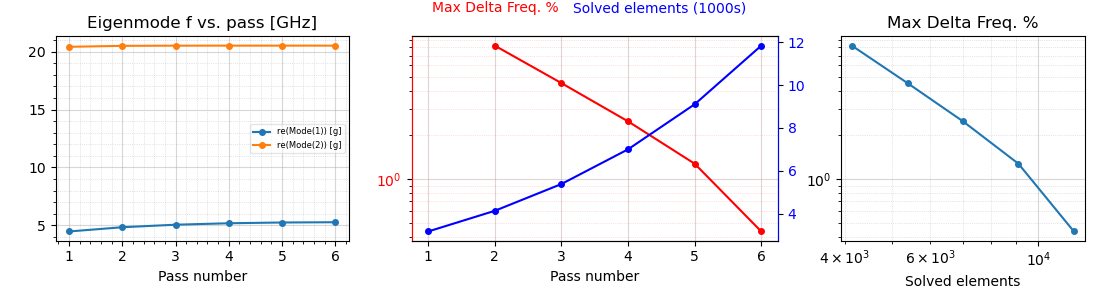

In [ ]:
transmons[1].options.pad_gap    = '40um'
transmons[1].options.pad_width  = '500um' # 405
transmons[1].options.pad_height = '120um'
gui.rebuild()

eig_qb = EPRanalysis(design, "hfss")
eig_qb.sim.setup.n_modes = 2

eig_qb.sim.run(name="Qbit2", components=['Q2'], open_terminations=[], box_plus_buffer = False)
eig_qb.sim.plot_convergences()

In [ ]:
transmons[2].options.pad_gap    = '40um'
transmons[2].options.pad_width  = '460um' # 405
transmons[2].options.pad_height = '120um'
gui.rebuild()

eig_qb = EPRanalysis(design, "hfss")
eig_qb.sim.setup.n_modes = 2

eig_qb.sim.run(name="Qbit3", components=['Q3'], open_terminations=[], box_plus_buffer = False)
eig_qb.sim.plot_convergences()

In [ ]:
transmons[3].options.pad_gap    = '40um'
transmons[3].options.pad_width  = '440um' # 405
transmons[3].options.pad_height = '120um'
gui.rebuild()

eig_qb = EPRanalysis(design, "hfss")
eig_qb.sim.setup.n_modes = 2

eig_qb.sim.run(name="Qbit4", components=['Q4'], open_terminations=[], box_plus_buffer = False)
eig_qb.sim.plot_convergences()

### Readout Resonators

In [ ]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_rd = EPRanalysis(design, "hfss")
readout_lines[0].options.total_length = '11.7mm'
gui.rebuild()
eig_rd.sim.setup.n_modes = 2
eig_rd.sim.setup.max_passes = 10
eig_rd.sim.run(name="Readout",
               components=['R1','ol1'])
eig_rd.sim.plot_convergences()

In [ ]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_rd = EPRanalysis(design, "hfss")
readout_lines[1].options.total_length = '11.2mm'
gui.rebuild()
eig_rd.sim.setup.n_modes = 2
eig_rd.sim.setup.max_passes = 10
eig_rd.sim.run(name="Readout",
               components=['R2','ol2'])
eig_rd.sim.plot_convergences()

In [ ]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_rd = EPRanalysis(design, "hfss")
readout_lines[2].options.total_length = '10.6mm'
gui.rebuild()
eig_rd.sim.setup.n_modes = 2
eig_rd.sim.setup.max_passes = 10
eig_rd.sim.run(name="Readout",
               components=['R3','ol3'])
eig_rd.sim.plot_convergences()

In [ ]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_rd = EPRanalysis(design, "hfss")
readout_lines[3].options.total_length = '10mm'
gui.rebuild()
eig_rd.sim.setup.n_modes = 2
eig_rd.sim.setup.max_passes = 10
eig_rd.sim.run(name="Readout",
               components=['R4','ol4'])
eig_rd.sim.plot_convergences()

## Couplers

In [ ]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_c = EPRanalysis(design, "hfss")
cpw[0].options.total_length = '10mm'
gui.rebuild()
eig_c.sim.setup.n_modes = 2
eig_c.sim.setup.passes = 10
eig_c.sim.run(name="CPW1",
               components=['cpw1'])
eig_c.sim.plot_convergences()

In [ ]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_c = EPRanalysis(design, "hfss")
cpw[1].options.total_length = '9.6mm'
gui.rebuild()
eig_c.sim.setup.n_modes = 2
eig_c.sim.setup.passes = 10
eig_c.sim.run(name="CPW2",
               components=['cpw3'])
eig_c.sim.plot_convergences()

In [ ]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_c = EPRanalysis(design, "hfss")
cpw[2].options.total_length = '9.3mm'
gui.rebuild()
eig_c.sim.setup.n_modes = 2
eig_c.sim.setup.passes = 10
eig_c.sim.run(name="CPW4",
               components=['cpw4'])
eig_c.sim.plot_convergences()

In [ ]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_c = EPRanalysis(design, "hfss")
cpw[3].options.total_length = '9mm'
gui.rebuild()
eig_c.sim.setup.n_modes = 2
eig_c.sim.setup.passes = 10
eig_c.sim.run(name="CPW5",
               components=['cpw5'])
eig_c.sim.plot_convergences()